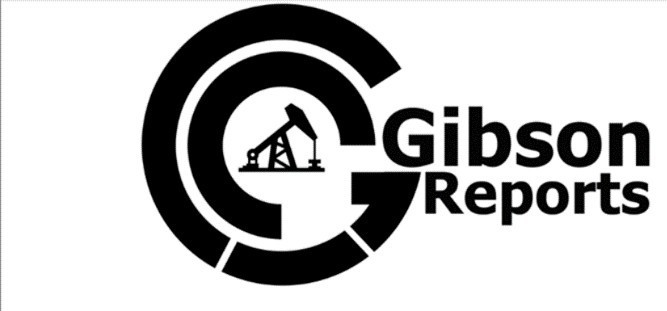

# <center>Gibson Reports AI Project<center>

The goal of this project is to create an algorithm which can scan pdf files and extract the rig name

In [1]:
import re
# import PyPDF2 as p2
import os
from pdfminer.high_level import extract_text
# import pandas as pd
# from pdfminer.converter import TextConverter
# from PyPDF2  import PdfFileReader


In [2]:
# from grabRigData import grabtxrrcdata

from postgresCheck import postgresCheck

In [2]:
path = 'C:/Users/Fahim/Desktop/Gibson Reports/AI/Temp'

# t = grabtxrrcdata()
# t.main(1)

# files = []
# count = 0
# for filename in os.listdir(path):
#     if filename.endswith('.pdf'):
        
#         pg = postgresCheck()
        
#         r = pg.checkFile(filename)
        
#         if r != 'missing':
#             if r[0] == 'ALTITUDE ENERGY PARTNERS, LLC':
#                 if r[1] != 'OTHER':
#                     count += 1
#                     print(r,filename)
                    
#         else:
#             continue
            
# print(count)
        


In [6]:
rigdb = pd.DataFrame(columns = ['ID','Rig_name'])

In [83]:


check_for_rig1 = re.compile(r'@\s+\w+\.\w+\s+\(\w+.*')
check_for_rig2 = re.compile(r'Rig Name: \w+.*')
check_for_rig3 = re.compile(r'RIG: \w+.*')
check_for_rig4 = re.compile(r'Rig ID: \w+.*')
check_for_rig5 = re.compile(r'\d{2}-\d{3}-\d{5}')
check_for_rig6 = re.compile(r'\d+/\d+/\d{4}')

for name in files:
    ID = name.split('.')[0].split('_')[2] 
    
    try:
    
        page1 = extract_text(name,page_numbers = [0])
        page4 = extract_text(name,page_numbers = [3])
    
    except:
        
        pass
        
    
    lines = []
    
    for line in page1.split('\n'):
        lines.append(line)

    
    #This will extract the ones using Rig Name: 
    for line1 in page1.split('\n'):
        match2 = check_for_rig2.search(line1)
        match4 = check_for_rig4.search(line1)
        match6 = check_for_rig6.search(line1)

        
        if match2 != None :
            rig_name = match2.group(0).replace('Rig Name: ','').strip()
            rigdb = rigdb.append({'ID':ID,'Rig_name':rig_name} , ignore_index = True)
#             print(match1.group(0).replace('Rig Name: ','').strip(),name.split('.')[0].split('_')[2])

        if match4 != None:
            rig_name = match4.group(0).replace('Rig ID: ','').strip()
            rigdb = rigdb.append({'ID':ID,'Rig_name':rig_name} , ignore_index = True)   

            
            
        
            
    #This section will catch the Gordon technologies ones

    count = 0
    for line in lines:
        count += 1
        if check_for_rig5.search(line):
            
            try:
                int(lines[count])
                break
            except ValueError:
            
                if lines[count] == '':
                    break
            
                elif lines[count] == "Rig:":
                    rig_name = lines[count+1]
                    rigdb = rigdb.append({'ID':ID,'Rig_name':rig_name} , ignore_index = True)
                
                else:
                    rig_name = lines[count]
                    rigdb = rigdb.append({'ID':ID,'Rig_name':rig_name} , ignore_index = True)
                    
#         elif check_for_rig6.search(line):
#             rig_name = lines[count-3]
#             rigdb = rigdb.append({'ID':ID,'Rig_name':rig_name} , ignore_index = True)

            
    
    #This will extract the compass format ones
    for line2 in page4.split('\n'):
        match1 = check_for_rig1.search(line2)
        match3 = check_for_rig3.search(line2)
        
        if match1 != None :
            rig_name = match1.group(0).split('(',)[1].replace(')','')
            rigdb = rigdb.append({'ID':ID,'Rig_name':rig_name} , ignore_index = True)      

#             print(match2.group(0).split('(',)[1].strip(')'),name.split('.')[0].split('_')[2])

        if match3 != None:
            rig_name = match3.group(0).replace('RIG: ','').strip()
            rigdb = rigdb.append({'ID':ID, 'Rig_name':rig_name} , ignore_index = True)


            

#     name.close() 
    
rigdb.drop_duplicates(keep = 'first',inplace = True)
# rigdb = rigdb[rigdb.Rig_name != 'Rig:']
rigdb = rigdb[rigdb.Rig_name != 'OWB']
# rigdb = rigdb[rigdb.Rig_name != '']
rigdb = rigdb[rigdb.Rig_name != 'Service Co:']
# rigdb = rigdb[rigdb.Rig_name != 'Job No.']
rigdb
rigdb.reset_index(drop = True)
    

,ID,Rig_name
0,5089295,Nabors 891
1,5089297,Job No. 66188
2,5089302,Job No. 66189
3,5089306,Job No. 66191
4,5089300,Nabors 891)
5,5089304,Nabors 891)
6,5089300,Nabors 891
7,5089304,Nabors 891


In [ ]:
rigdb

In [4]:
import ast

file = open("Companies.txt", "r")

contents = file.read()
Companies = ast.literal_eval(contents)


file.close()

In [7]:
Companies

{'ACCURATE DIRECTIONAL SURVEY, LLC': '5104727',
 'AIM DIRECTIONAL SERVICES, LLC': '5108836',
 'ALTITUDE ENERGY PARTNERS, LLC': '5096211',
 'BAKER HUGHES INTEQ': '5100327',
 'BORE PATH SERVICES, INC.': '5106909',
 'CATHEDRAL ENERGY SERVICES INC.': '5098623',
 'CHOICE DIRECTIONAL SVCS US CORP.': '5118762',
 'DIXON DIRECTIONAL, LLC': '5096085',
 'DOUBLEBARREL DOWNHOLE TECH LLC': '5107015',
 'GEO-MAG MWD LLC': '5119431',
 'GORDON TECHNOLOGIES LLC': '5099179',
 'GYRODATA': '5099305',
 'HALLIBURTON ENERGY SERVICES': '5098781',
 'HT MWD SOLUTIONS, LLC': '5130108',
 'INTREPID D.D.S., LTD.': '5100587',
 'INVICTUS TOOLS, LLC': '5100673',
 'LEAM DRILLING SERVICES': '5093180',
 'LEGACY DIRECTIONAL DRILLING, LLC': '5095669',
 'LIBERTY DRILLING SERVICES, LLC': '5087035',
 'METEORITE ENERGY SERVICES INC.': '5096797',
 'MS ENERGY SERVICES': '5124908',
 'NABORS DRILLING TECH USA, INC.': '5092083',
 'NATIONAL OILWELL VARCO, L.P.': '5096409',
 'NEWSCO INTL ENERGY SVC USA INC.': '5096728',
 'PATRIOT DRILL

In [ ]:
count = 0
for filename in os.listdir(path):
    if filename.endswith(".pdf"): 
        
        output_name = filename
        
        try:
            !ocrmypdf {filename} {output_name} --force-ocr
            print(filename,' Done!')
            
        except exception:
            print(exception)
            continue
    else:
        continue

dir_survey_5084649.pdf  Done!


Start processing 8 pages concurrently
An exception occurred while executing the pipeline
multiprocessing.pool.RemoteTraceback: 
"""
Traceback (most recent call last):
  File "c:\users\fahim\anaconda3\lib\multiprocessing\pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "c:\users\fahim\anaconda3\lib\site-packages\ocrmypdf\_sync.py", line 190, in exec_page_sync
    page_context, orientation_correction
  File "c:\users\fahim\anaconda3\lib\site-packages\ocrmypdf\_sync.py", line 119, in make_intermediate_images
    remove_vectors=False,
  File "c:\users\fahim\anaconda3\lib\site-packages\ocrmypdf\_pipeline.py", line 451, in rasterize
    filter_vector=remove_vectors,
  File "c:\users\fahim\anaconda3\lib\site-packages\pluggy\hooks.py", line 286, in __call__
    return self._hookexec(self, self.get_hookimpls(), kwargs)
  File "c:\users\fahim\anaconda3\lib\site-packages\pluggy\manager.py", line 93, in _hookexec
    return self._inner_hookexec(hook, methods, kwargs)
 

dir_survey_5084655.pdf  Done!


Start processing 8 pages concurrently
An exception occurred while executing the pipeline
multiprocessing.pool.RemoteTraceback: 
"""
Traceback (most recent call last):
  File "c:\users\fahim\anaconda3\lib\multiprocessing\pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "c:\users\fahim\anaconda3\lib\site-packages\ocrmypdf\_sync.py", line 190, in exec_page_sync
    page_context, orientation_correction
  File "c:\users\fahim\anaconda3\lib\site-packages\ocrmypdf\_sync.py", line 119, in make_intermediate_images
    remove_vectors=False,
  File "c:\users\fahim\anaconda3\lib\site-packages\ocrmypdf\_pipeline.py", line 451, in rasterize
    filter_vector=remove_vectors,
  File "c:\users\fahim\anaconda3\lib\site-packages\pluggy\hooks.py", line 286, in __call__
    return self._hookexec(self, self.get_hookimpls(), kwargs)
  File "c:\users\fahim\anaconda3\lib\site-packages\pluggy\manager.py", line 93, in _hookexec
    return self._inner_hookexec(hook, methods, kwargs)
 

In [73]:
count

10

In [13]:
pdf = PdfFileReader(open('dir_survey_5111816.pdf', 'rb'))
page = pdf.getPage(3).mediaBox

if page.getUpperRight_x() - page.getUpperLeft_x() > page.getUpperRight_y() - page.getLowerRight_y():
    print('Landscape')
else:
    print('Portrait')

Portrait


In [29]:
'''
['ALTITUDE ENERGY PARTNERS, LLC', 'MWD'] dir_survey_5096193.pdf
['ALTITUDE ENERGY PARTNERS, LLC', 'MWD'] dir_survey_5096211.pdf
['ALTITUDE ENERGY PARTNERS, LLC', 'MWD'] dir_survey_5111804.pdf
['ALTITUDE ENERGY PARTNERS, LLC', 'MWD'] dir_survey_5111816.pdf

'''

"\n['ALTITUDE ENERGY PARTNERS, LLC', 'MWD'] dir_survey_5096193.pdf\n['ALTITUDE ENERGY PARTNERS, LLC', 'MWD'] dir_survey_5096211.pdf\n['ALTITUDE ENERGY PARTNERS, LLC', 'MWD'] dir_survey_5111804.pdf\n['ALTITUDE ENERGY PARTNERS, LLC', 'MWD'] dir_survey_5111816.pdf\n\n"

In [46]:
PDFfile = open(file_name,'rb')
pdf_read = p2.PdfFileReader(PDFfile)
pages = pdf_read.getNumPages()
page= pdf_read.getPage(0)
page_text = page.extractText()
print(page_text)

Directional Survey Report






SvyIncAzm
DLSCLCDCATemp









































































DepthTVD
NSEWVS














Page 1



In [68]:

try:
    !ocrmypdf {file_name} output3.pdf --force-ocr
    print('Done!')
except:
    print('Already done!')
    
    

Done!


Start processing 8 pages concurrently
Postprocessing...
Some input metadata could not be copied because it is not permitted in PDF/A. You may wish to examine the output PDF's XMP metadata.
Optimize ratio: 1.00 savings: -0.1%
Image optimization did not improve the file - discarded
Output file is a PDF/A-2B (as expected)
The output file size is 20.13× larger than the input file.
Possible reasons for this include:
The argument --force-ocr was issued, causing transcoding.
The optional dependency 'jbig2' was not found, so some image optimizations could not be attempted.
The optional dependency 'pngquant' was not found, so some image optimizations could not be attempted.
PDF/A conversion was enabled. (Try `--output-type pdf`.)



In [66]:
import ocrmypdf


ocrmypdf.ocr(file_name,file_name,force = True)

Scanning contents: 100%|███████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  2.92page/s]
OCR: 100%|█████████████████████████████████████████████████████████████████████████| 5.0/5.0 [00:13<00:00,  2.77s/page]
JPEGs: 0image [00:00, ?image/s]
JBIG2: 0item [00:00, ?item/s]
The output file size is 4.59× larger than the input file.
Possible reasons for this include:
The argument --force-ocr was issued, causing transcoding.
The optional dependency 'jbig2' was not found, so some image optimizations could not be attempted.
The optional dependency 'pngquant' was not found, so some image optimizations could not be attempted.
PDF/A conversion was enabled. (Try `--output-type pdf`.)



<ExitCode.ok: 0>

In [12]:
!ocrmypdf dir_survey_5172547.pdf dir_survey_5172547.pdf  --force-ocr

Using Tesseract OpenMP thread limit 3
Start processing 2 pages concurrently
    2    **** Error: stream operator isn't terminated by valid EOL.
               Output may be incorrect.
   **** Error: stream operator isn't terminated by valid EOL.
               Output may be incorrect.

    1    **** Error: stream operator isn't terminated by valid EOL.
               Output may be incorrect.
   **** Error: stream operator isn't terminated by valid EOL.
               Output may be incorrect.

Postprocessing...
Optimize ratio: 1.00 savings: 0.0%
Output file is a PDF/A-2B (as expected)


In [5]:
path = 'C:/Users/Fahim/Desktop/Gibson Reports/AI/Temp'
os.chdir(path)

In [6]:
file_name = 'dir_survey_5120798.pdf '
os.startfile(file_name)

In [20]:
pg = postgresCheck()

In [33]:
company = pg.checkFile(file_name)

In [34]:
company

['DEFINITIVE DIRECTIONAL , LLC', 'MWD']

In [36]:
text = extract_text(file_name,page_numbers = [0])
print(text)


Page 1

10/29/2020

Minimum Curvature Calculation

Client: XTO

Well: KARINO 48-19-30 WA5 705H

County, ST: PECOS

Rig: AKITA 22

Job #: PB-191214
M.W.D. Operators: S.GILL / R.KIRKPATRICK
Directional Drillers: J.SHEEN 

Tool Azimuth to Grid North: 8.09

Lat / Long: 31° 8' 42.822 N  / 103° 9' 23.376 W

Geomagnetic Model: HDGM

Single or Multi-well Pad ( # /total): MULTI-WELL (2/3)
MSA Corrected Runs: Curve and Lateral 

API#: 42-371-40151
RKB / GL: 2756.00/22.00
Vertical Section Angle: Azm.

181.50

Azm (MSA 
corrected)

Survey # Meas. Depth

Inc.

T.V.D.

Ver. Sect. +N / -S +E / -W DLS

0.00
112.00
145.00
210.00
296.00
391.00
485.00
579.00
674.00
769.00
864.00
959.00
1054.00
1148.00
1242.00
1337.00
1431.00
1526.00
1620.00
1710.00

0.00
0.00
0.77
0.80
0.84
0.64
0.77
0.78
2.35
2.65
2.28
2.11
1.87
2.34
2.73
1.80
0.99
0.48
0.37
0.37

Azm. (no MSA 
correction)
0.00
0.00
81.47
286.59
121.12
108.64
224.15
233.77
248.97
265.43
258.79
240.91
233.93
231.49
242.32
236.43
226.51
246.54
273.39
273.

In [15]:
lines = []
for line in text.split('\n'):
    lines.append(line)

In [90]:
# regexDict = {'PHOENIX TECHNOLOGY SERV USA INC.':r'@\s+\w+\.\w+\s+\(\w+.*'}

In [17]:
check_for_rig = re.compile(r'@\s+\w+\.\w+\s+\(\w+.*')
# check_for_rig = re.compile(r'@ \w+\.\w+.*')
check_for_rig2 = re.compile(r'Rig\s+Name:\s+\w+.*')
check_for_rig3 = re.compile(r'RIG: \w+.*')
check_for_rig3v2 = re.compile(r'Rig:\s+\w+.*')
check_for_rig4 = re.compile(r'Rig\s+ID:')

check_for_rig5 = re.compile(r'\d{2}-\d{3}-\d{5}')
check_for_rig6 = re.compile(r'\d+/\d+/\d{4}')
check_for_rig7 = re.compile(r'Wellbore:')
check_for_rig8 = re.compile(r'Location:.*')
check_for_rig9 = re.compile(r'\d+/\d+/\d{4}')
check_for_rig10 = re.compile(r'API#')
check_for_rig11 = re.compile(r'.*B\)')
check_for_rig12 = re.compile(r'Job Notes:')


# check_for_rig8 = re.compile(regexDict['PHOENIX TECHNOLOGY SERV USA INC.'])


In [18]:
count = 0
for line in lines:
    count += 1
    match = check_for_rig3v2.search(line)
    if match != None:
        rig_name = match.group(0)
#         rig_name = lines[count+1]
        
            
        print(rig_name)
        
count

        

        
# for line in text.split('\n'):
#     match = check_for_rig.search(line)
#     if match != None:
        
#         rigname = match.group(0)
#         print(rigname)

    

Rig:  Cartel  11 


294

In [12]:
# rig_name.split('(',)[1].strip(')')
rig_name.replace('Rig:','').strip()
rig_name

NameError: name 'rig_name' is not defined

In [106]:
rig_name

'Citadel 6'

In [140]:
s = 'er123'

In [141]:
try:
    print(int(s))
except ValueError:
    pass